In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [3]:
df = pd.read_csv('data/observations_rec_jk_nov_26_2024.csv')
df_2 = pd.read_csv('data/observations_rec_m_nov_25_2024.csv')
df.head()

,time,count,direction
0,8:30,25,in
1,8:40,52,in
2,8:40,1,out
3,8:50,220,in
4,8:50,2,out


In [4]:
df['time_float'] = df['time'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60)
df_in = df[df['direction'] == 'in']
df_2['time_float'] = df_2['time'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60)
df_in_2 = df_2[df_2['direction'] == 'in']
time_in = []
for i in range(len(df_in)):
    time_in += [df_in.iloc[i]['time_float']] * df_in.iloc[i]['count']

time_in

time_in_2 = []
for i in range(len(df_in_2)):
    time_in_2 += [df_in_2.iloc[i]['time_float']] * df_in_2.iloc[i]['count']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


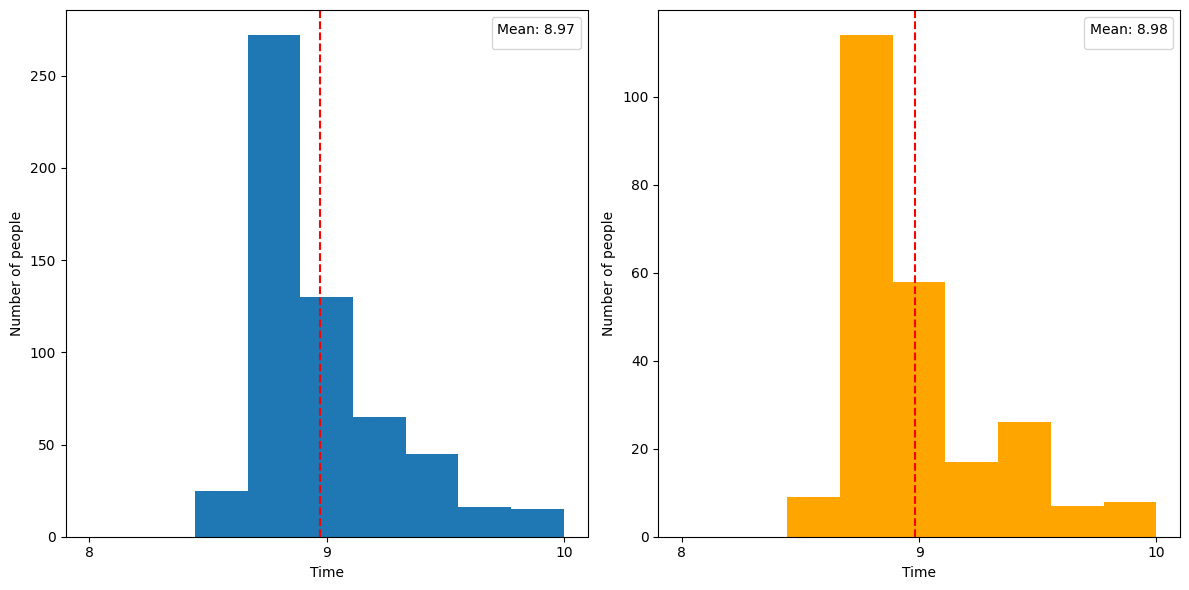

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot time_in
ax1.hist(time_in, bins=9, range=(8, 10))
ax1.set_xticks(range(8, 11))
ax1.set_xlabel('Time')
ax1.set_ylabel('Number of people')
# add vertical line for mean
mean = sum(time_in) / len(time_in)
ax1.legend(title=f'Mean: {mean:.2f}', loc='upper right')
ax1.axvline(x=mean, color='red', linestyle='--')

# plot time_in_2
ax2.hist(time_in_2, bins=9, range=(8, 10), color='orange')
ax2.set_xticks(range(8, 11))
ax2.set_xlabel('Time')
ax2.set_ylabel('Number of people')

mean_2 = sum(time_in_2) / len(time_in_2)
ax2.legend(title=f'Mean: {mean_2:.2f}', loc='upper right')
ax2.axvline(x=mean_2, color='red', linestyle='--')
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


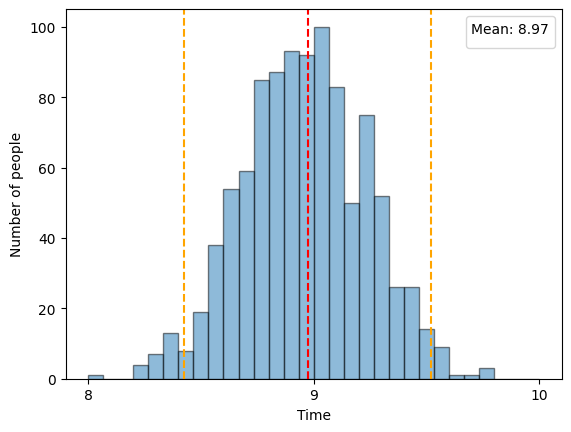

In [6]:
# create a model
mu, std = norm.fit(time_in)
# simulate 1000 samples
samples = np.random.normal(mu, std, 1000)
# plot the histogram of samples
plt.hist(samples, bins=30, range=(8, 10), alpha=0.5, edgecolor='black')
plt.xticks(range(8, 11))
plt.xlabel('Time')
plt.ylabel('Number of people')

plt.legend(title=f'Mean: {mean:.2f}', loc='upper right')
plt.axvline(x=mean, color='red', linestyle='--')
ci = norm.interval(0.95, loc=mu, scale=std)
plt.axvline(x=ci[0], color='orange', linestyle='--')
plt.axvline(x=ci[1], color='orange', linestyle='--')

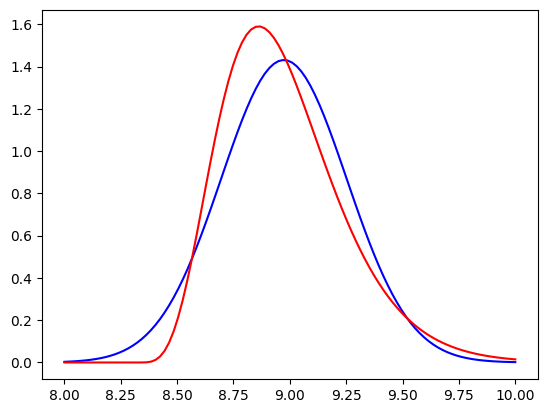

In [7]:
# fit and plot a gamma distribution
from scipy.stats import gamma
params = gamma.fit(time_in)
# sample 1000 times
samples = gamma.rvs(*params, size=1000)
x = np.linspace(8, 10, 100)
y = gamma.pdf(x, *params)
x_norm = np.linspace(8, 10, 100)
y_norm = norm.pdf(x_norm, mu, std)
# plot time_in histogram underneath
# plt.hist(time_in, bins=7, range=(8, 10), alpha=0.5, edgecolor='black')
# plot
plt.plot(x_norm, y_norm, color='blue')
plt.plot(x, y, color='red')

In [8]:
sample = np.random.choice(time_in, 1)
sample

array([8.66666667])

In [9]:
from scipy.stats import gaussian_kde

def create_probability_function(time_in_list):
    # Flatten the list of time_in arrays
    all_times = np.concatenate(time_in_list)
    
    # Create a kernel density estimate of the data
    kde = gaussian_kde(all_times)
    
    # Define a function that returns the probability for a given time
    def probability_function(time):
        return kde(time)
    
    return probability_function

def sample_from_probability_function(probability_function, num_samples=1):
    # Define the range of time values to sample from
    time_range = np.linspace(min(time_in_list[0]), max(time_in_list[0]), 1000)
    
    # Get the probabilities for each time value
    probabilities = probability_function(time_range)
    
    # Normalize the probabilities
    probabilities /= probabilities.sum()
    
    # Sample from the time range based on the probabilities
    samples = np.random.choice(time_range, size=num_samples, p=probabilities)
    
    return samples

# Example usage
time_in_list = [time_in, time_in_2]
probability_function = create_probability_function(time_in_list)
samples = sample_from_probability_function(probability_function, num_samples=5)
print(samples)

[8.75225225 8.95512179 8.89239239 9.46629963 9.83333333]


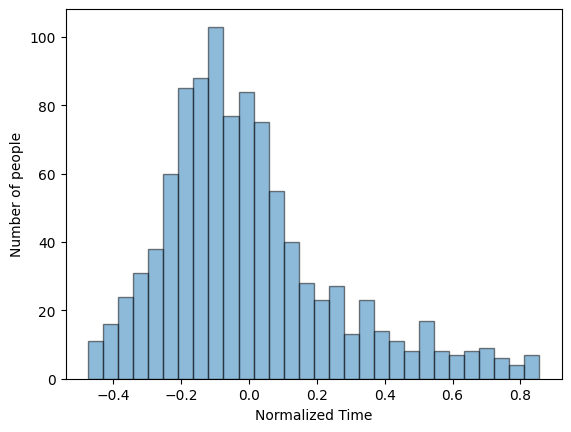

In [10]:
samples = sample_from_probability_function(probability_function, num_samples=1000)
normalized_samples = samples - np.mean(samples)
plt.hist(normalized_samples, bins=30, alpha=0.5, edgecolor='black')
plt.xlabel('Normalized Time')
plt.ylabel('Number of people')
plt.show()


In [13]:
# save 10000 samples in csv
samples = sample_from_probability_function(probability_function, num_samples=10000)
samples_df = pd.DataFrame(normalized_samples, columns=['time'])
samples_df.to_csv('data/samples.csv', index=False)